[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


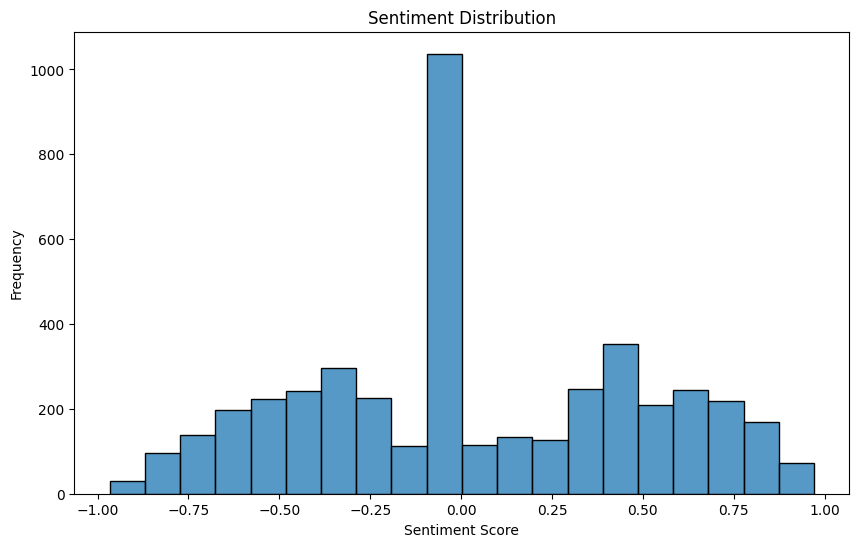

2684    @united Don't know last name, Karen call cente...
1648    @united look beauty 😉 dc-10 united airline 😉 H...
2437    @united What really GREAT &amp; FLATTERING sto...
3545    @united please give special thanks Aaron Tampa...
2130    @united What really GREAT &amp; FLATTERING sto...
2374    @united cldnt happier w many plastic wing pin ...
238     @VirginAmerica hahaha 😂@VirginAmerica YOU GUYS...
4137    @united You might dealing frustrated passenege...
4078    @united thanks help! Totally appreciate made s...
2762    @united free booze Bach party would make bette...
Name: text, dtype: object
1214    @united worst. Worst reservation policies. Wor...
2436    @united UNBELIEVABLY DISAPPOINTED. DELAY AFTER...
1374    @united Cancelled Flighted flight, 2 delays, l...
3135    @united WTF!?!? Delay delay. 15 hour YVR SAN? ...
2931    @united Once I victim scam SHIT Customer Servi...
1197    @united worst airline world! From crap website...
3241    @united worst airline ever! Staff nast

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('/content/Tweets.csv')

# Create a sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Calculate the sentiment scores for each tweet
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

# Remove stopwords and lemmatize the text
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in stop_words]))

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Plot the top 10 positive tweets
positive_tweets = df[df['sentiment'] > 0.5].sort_values(by='sentiment', ascending=False).head(10)
print(positive_tweets['text'])

# Plot the top 10 negative tweets
negative_tweets = df[df['sentiment'] < -0.5].sort_values(by='sentiment', ascending=True).head(10)
print(negative_tweets['text'])